In the context of the moving average crossover strategy, the ‘signal’ column in the signals DataFrame represents the trading signals generated by the strategy. Here’s what the values mean:

1: This represents a “Buy” signal. It indicates that the short-term moving average has crossed above the long-term moving average, suggesting an upward trend in the stock price. This is typically considered a bullish signal, and traders might consider entering a long position or buying the stock.

0: This represents a “Sell” signal. It indicates that the short-term moving average has crossed below the long-term moving average, suggesting a downward trend in the stock price. This is typically considered a bearish signal, and traders might consider exiting a long position or selling the stock.

In [8]:

#pygubu-designer    

# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Function to calculate RSI
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        
    up_chg = 0 * diff
    down_chg = 0 * diff
    up_chg[diff > 0] = diff[ diff>0 ]
    down_chg[diff < 0] = diff[ diff < 0 ]
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

today = dt.date.today()

#####################################################
# Download historical data for desired ticker symbol
ticker = "TSLA"

#####################################################


tickerData = yf.Ticker(ticker)
df = tickerData.history(period='1d', start='2021-1-1', end=today,auto_adjust=False)

####################################################

# Calculate short-term and long-term moving averages
#Change the short or long to optimaze the portfolio

short_window = 3  
long_window = 25
####################################################



signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Calculate RSI
rsi = computeRSI(df['Close'], 14)

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()

# Export signals to csv
signals.to_csv('signals.csv')

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,14))
ax1.set_ylabel('Price in $', fontsize=30)
df['Close'].plot(ax=ax1, color='r', lw=2., label='Close Price')
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
buy_signals = signals.loc[signals.positions == 1.0]
sell_signals = signals.loc[signals.positions == -1.0]
ax1.plot(buy_signals.index, signals.short_mavg[buy_signals.index],
         '^', markersize=10, color='m', label='Buy')
ax1.plot(sell_signals.index, signals.short_mavg[sell_signals.index],
         'v', markersize=10, color='k', label='Sell')
#for i in range(len(buy_signals)):
#    ax1.text(buy_signals.index[i], signals.short_mavg[buy_signals.index[i]], 
#             'Buy\n' + str(buy_signals.index[i].date()) + '\n' + str(df['Close'][buy_signals.index[i]]), 
#             fontsize=8, verticalalignment='bottom')
##for i in range(len(sell_signals)):
##    ax1.text(sell_signals.index[i], signals.short_mavg[sell_signals.index[i]], 
##            'Sell\n' + str(sell_signals.index[i].date()) + '\n' + str(df['Close'][sell_signals.index[i]]), 
#             fontsize=8, verticalalignment='top')
ax1.legend(loc='best')
ax1.grid(True)

# Plot volume in subplot
ax2.bar(df.index, df['Volume'], color='blue', alpha=0.7)
ax2.set_ylabel('Volume', fontsize=12)
ax2.grid(True)

plt.show()


TSLA: No price data found, symbol may be delisted (1d 2021-1-1 -> 2024-05-01)


ValueError: cannot set using a slice indexer with a different length than the value

# Import necessary libraries
import itertools

# Define the range of possible values for short_window and long_window
short_window_range = range(20, 60)
long_window_range = range(50, 250)

# Initialize variables to store the optimal values
optimal_short_window = None
optimal_long_window = None
max_rsi = -np.inf

# Iterate over all combinations of short_window and long_window
for short_window, long_window in itertools.product(short_window_range, long_window_range):
    # Skip if short_window is not less than long_window
    if short_window >= long_window:
        continue

    # Calculate the moving averages
    signals['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Calculate the RSI
    rsi = computeRSI(df['Close'], 14)

    # Update the optimal values if the current RSI is greater than the maximum RSI found so far
    if rsi[-1] > max_rsi:
        max_rsi = rsi[-1]
        optimal_short_window = short_window
        optimal_long_window = long_window

print(f"The optimal period for short_window is {optimal_short_window}")
print(f"The optimal period for long_window is {optimal_long_window}")


In [ ]:
import pandas as pd

# Create a list of tuples, where each tuple contains the date, close price and signal
trade_list = [(date, df.loc[date, 'Close'], 'Buy' if signals.loc[date, 'signal'] == 1.0 else 'Sell') for date in df.index]

# Convert the list to a DataFrame
df_trade = pd.DataFrame(trade_list, columns=['Date', 'Close Price', 'Signal'])

# Save the DataFrame to a CSV file
df_trade.to_csv('Trades.csv', index=False)

print("The trade list has been saved to signals.csv")

The trade list has been saved to signals.csv


In [ ]:
# Create a list of tuples, where each tuple contains the date, close price and signal
trade_list = [(date, df.loc[date, 'Close'], 'Buy' if signals.loc[date, 'signal'] == 1.0 else 'Sell') for date in df.index]

# Sort the list in descending order
trade_list.sort(reverse=True)

# Print the list
for item in trade_list:
    print(f"Date: {item[0]}, Close Price: {item[1]}, Signal: {item[2]}")
    


Date: 2024-04-30 00:00:00-04:00, Close Price: 183.27999877929688, Signal: Buy
Date: 2024-04-29 00:00:00-04:00, Close Price: 194.0500030517578, Signal: Buy
Date: 2024-04-26 00:00:00-04:00, Close Price: 168.2899932861328, Signal: Buy
Date: 2024-04-25 00:00:00-04:00, Close Price: 170.17999267578125, Signal: Sell
Date: 2024-04-24 00:00:00-04:00, Close Price: 162.1300048828125, Signal: Sell
Date: 2024-04-23 00:00:00-04:00, Close Price: 144.67999267578125, Signal: Sell
Date: 2024-04-22 00:00:00-04:00, Close Price: 142.0500030517578, Signal: Sell
Date: 2024-04-19 00:00:00-04:00, Close Price: 147.0500030517578, Signal: Sell
Date: 2024-04-18 00:00:00-04:00, Close Price: 149.92999267578125, Signal: Sell
Date: 2024-04-17 00:00:00-04:00, Close Price: 155.4499969482422, Signal: Sell
Date: 2024-04-16 00:00:00-04:00, Close Price: 157.11000061035156, Signal: Sell
Date: 2024-04-15 00:00:00-04:00, Close Price: 161.47999572753906, Signal: Sell
Date: 2024-04-12 00:00:00-04:00, Close Price: 171.05000305175

In [ ]:
# Initialize the portfolio with the initial investment
portfolio = 10000
# Initialize a variable to hold the number of shares
shares = 0

# Create a list to store the trades
trades = []

# Iterate over the trade list
for date, close_price, signal in trade_list:
    # If the signal is 'Buy' and we have enough money to buy at least one share, buy as many shares as we can
    if signal == 'Buy' and portfolio >= close_price:
        shares_bought = portfolio // close_price
        portfolio -= shares_bought * close_price
        shares += shares_bought
        trades.append((date, 'Buy', shares_bought, close_price, portfolio))
    # If the signal is 'Sell', sell all our shares
    elif signal == 'Sell' and shares > 0:
        portfolio += shares * close_price
        trades.append((date, 'Sell', shares, close_price, portfolio))
        shares = 0

# Convert the list of trades to a DataFrame
trades_df = pd.DataFrame(trades, columns=['Date', 'Action', 'Shares', 'Price', 'Portfolio Value'])


# Export the DataFrame to a CSV file
trades_df.to_csv('portfolio.csv', index=False)

print("Trades have been exported to portfolio.csv")


Trades have been exported to portfolio.csv


In [ ]:
# Initialize the portfolio with the initial investment
portfolio = 10000
# Initialize a variable to hold the number of shares
shares = 0

# Create a list to store the portfolio value over time
portfolio_values = []

# Iterate over the signals DataFrame
for date, row in signals.iterrows():
    # Get the close price for this date
    close_price = df.loc[date, 'Close']
    
    # If the signal is 1.0 (buy) and we have enough money to buy at least one share, buy as many shares as we can
    if row['signal'] == 1.0 and portfolio >= close_price:
        shares_bought = portfolio // close_price
        portfolio -= shares_bought * close_price
        shares += shares_bought
    # If the signal is 0.0 (sell), sell all our shares
    elif row['signal'] == 0.0 and shares > 0:
        portfolio += shares * close_price
        shares = 0
    # Calculate the total value of the portfolio (cash + value of shares) and append it to the list
    total_value = portfolio + shares * close_price
    portfolio_values.append(total_value)

# Print the final value of the portfolio
print(f"Final portfolio value: {portfolio_values[-1]}")
print(portfolio_values)

Final portfolio value: 30865.20574951172
[10000.0, 10000.0, 10000.0, 10000.0, 10767.759765625, 9941.799926757812, 10400.799926757812, 10460.440307617188, 10347.51953125, 10121.439575195312, 10342.119750976562, 10412.920043945312, 10347.399780273438, 10367.199340820312, 10777.1201171875, 10804.600219726562, 10577.440307617188, 10232.679443359375, 9729.880249023438, 10285.240234375, 10285.240234375, 10074.073852539062, 10019.240020751953, 10045.373596191406, 10175.92398071289, 10013.056701660156, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.257598876953, 9492.2

# Define the range of possible values for short_window and long_window
short_window_range = range(1, 61)
long_window_range = range(1, 261)

# Initialize variables to store the optimal values
optimal_short_window = None
optimal_long_window = None
max_portfolio_value = -np.inf

# Iterate over all combinations of short_window and long_window
for short_window, long_window in itertools.product(short_window_range, long_window_range):
    # Skip if short_window is not less than long_window
    if short_window >= long_window:
        continue

    # Calculate the moving averages
    signals['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)   
    signals['positions'] = signals['signal'].diff()

    # Initialize the portfolio with the initial investment
    portfolio = 10000
    # Initialize a variable to hold the number of shares
    shares = 0

    # Iterate over the signals DataFrame
    for date, row in signals.iterrows():
        # Get the close price for this date
        close_price = df.loc[date, 'Close']

        # If the signal is 1.0 (buy) and we have enough money to buy at least one share, buy as many shares as we can
        if row['signal'] == 1.0 and portfolio >= close_price:
            shares_bought = portfolio // close_price
            portfolio -= shares_bought * close_price
            shares += shares_bought
        # If the signal is 0.0 (sell), sell all our shares
        elif row['signal'] == 0.0 and shares > 0:
            portfolio += shares * close_price
            shares = 0

    # Calculate the final value of the portfolio (cash + value of shares)
    final_portfolio_value = portfolio + shares * close_price

    # Update the optimal values if the current final portfolio value is greater than the maximum final portfolio value found so far
    if final_portfolio_value > max_portfolio_value:
        max_portfolio_value = final_portfolio_value
        optimal_short_window = short_window
        optimal_long_window = long_window

print(f"The optimal period for short_window is {optimal_short_window}")
print(f"The optimal period for long_window is {optimal_long_window}")
print(f"The highest final portfolio value is {max_portfolio_value}")


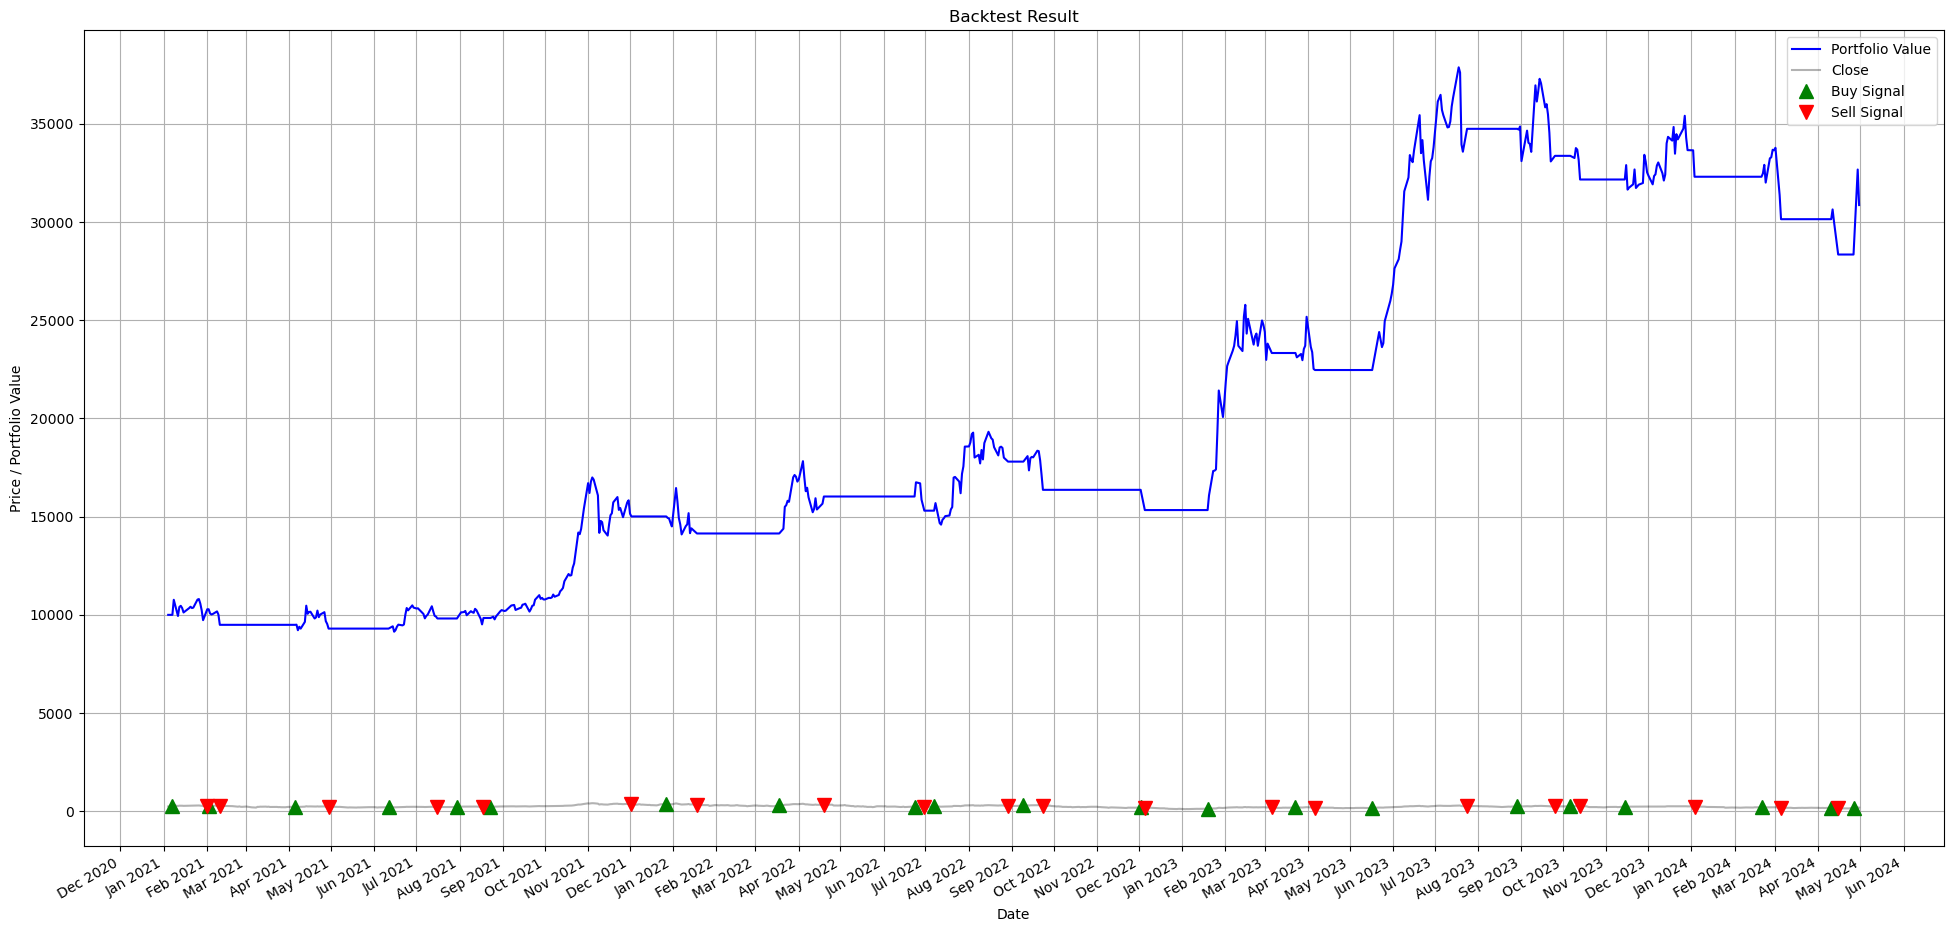

In [ ]:
import matplotlib.dates as mdates

# Initialize the portfolio with the initial investment
portfolio = 10000
# Initialize a variable to hold the number of shares
shares = 0

# Create a list to store the portfolio value over time
portfolio_values = []

# Create lists to store the buy and sell dates for plotting
buy_dates = []
sell_dates = []

# Iterate over the signals DataFrame
for date, row in signals.iterrows():
    # Get the close price for this date
    close_price = df.loc[date, 'Close']
    
    # If the signal is 1.0 (buy) and we have enough money to buy at least one share, buy as many shares as we can
    if row['signal'] == 1.0 and portfolio >= close_price:
        shares_bought = portfolio // close_price
        portfolio -= shares_bought * close_price
        shares += shares_bought
        buy_dates.append(date)
    # If the signal is 0.0 (sell), sell all our shares
    elif row['signal'] == 0.0 and shares > 0:
        portfolio += shares * close_price
        shares = 0
        sell_dates.append(date)
    # Calculate the total value of the portfolio (cash + value of shares) and append it to the list
    total_value = portfolio + shares * close_price
    portfolio_values.append(total_value)

# Create a DataFrame for easy plotting
portfolio_df = pd.DataFrame(portfolio_values, index=df.index, columns=['Portfolio Value'])

# Plot the portfolio value
fig, ax = plt.subplots(figsize=(24, 12))
portfolio_df.plot(ax=ax, color='blue')
df['Close'].plot(ax=ax, color='black', alpha=0.3)

# Add markers for buy and sell signals
ax.plot(buy_dates, df.loc[buy_dates, 'Close'], '^', markersize=10, color='g', label='Buy Signal')
ax.plot(sell_dates, df.loc[sell_dates, 'Close'], 'v', markersize=10, color='r', label='Sell Signal')

# Customize the plot
ax.set(title='Backtest Result', xlabel='Date', ylabel='Price / Portfolio Value')
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()


In [ ]:
print(portfolio_df.iloc[::-1])


                           Portfolio Value
Date                                      
2024-04-30 00:00:00-04:00     30865.205750
2024-04-29 00:00:00-04:00     32674.566467
2024-04-26 00:00:00-04:00     28346.884827
2024-04-25 00:00:00-04:00     28346.884827
2024-04-24 00:00:00-04:00     28346.884827
...                                    ...
2021-01-08 00:00:00-05:00     10767.759766
2021-01-07 00:00:00-05:00     10000.000000
2021-01-06 00:00:00-05:00     10000.000000
2021-01-05 00:00:00-05:00     10000.000000
2021-01-04 00:00:00-05:00     10000.000000

[836 rows x 1 columns]
